# Flight Fare Prediction - EDA and Modeling

In this notebook, we will be using the sample flight dataset, to predict the flight prices.


First we will explore the data. Then we preprocess the data and train the model.
We will try different models and see which one gives the best accuracy.
Then we will fine tune the model and see which one gives the best accuracy.
Finally, we will predict the flight prices for the test data.

In [85]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Preprocessing
from sklearn.preprocessing import StandardScaler

from math import sqrt

# Model building

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV

# metrics
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error as mse

warnings.filterwarnings('ignore')


## Import the data and explore.

In [9]:
# import data
df = pd.read_excel('airfare.xlsx')
# pd.set_option('display.max_columns', None)
df.head()


,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
df_distance = pd.read_csv('air_distance.csv')
df_distance.head()

,Unnamed: 0,Source,Dest,Distance(Km)
0,0,BLR,DEL,1709.71
1,1,CCU,IXR,327.84
2,2,IXR,BBI,344.54
3,3,BBI,BLR,1166.17
4,4,DEL,LKO,423.41


In [11]:
df_distance.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df_distance.head()

,Source,Dest,Distance(Km)
0,BLR,DEL,1709.71
1,CCU,IXR,327.84
2,IXR,BBI,344.54
3,BBI,BLR,1166.17
4,DEL,LKO,423.41


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            9000 non-null   object
 1   Date               9000 non-null   object
 2   Departure Station  9000 non-null   object
 3   Arrival Station    9000 non-null   object
 4   Route Map          9000 non-null   object
 5   Departure Time     9000 non-null   object
 6   Arrival Time       9000 non-null   object
 7   Journey Time       9000 non-null   object
 8   Stops              9000 non-null   object
 9   Extra Info         9000 non-null   object
 10  Price              9000 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 773.6+ KB


In [14]:
df.describe()

,Price
count,9000.000000
mean,9087.764333
std,4605.498942
min,1759.000000
25%,5228.000000
50%,8369.000000
75%,12373.000000
max,79512.000000


In [15]:
df.describe(include='object')

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info
count,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000
unique,12,44,5,6,124,220,1236,362,4,9
top,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3227,429,3832,3832,2024,194,349,471,4753,7053


In [16]:
df_distance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Source        126 non-null    object 
 1   Dest          126 non-null    object 
 2   Distance(Km)  126 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.1+ KB


In [17]:
df_distance.describe()

,Distance(Km)
count,126.000000
mean,883.743889
std,499.723305
min,124.360000
25%,468.647500
50%,795.065000
75%,1274.857500
max,2233.080000


In [18]:
df_distance.describe(include='object')

,Source,Dest
count,126,126
unique,42,42
top,DEL,BOM
freq,20,18


In [19]:
df_distance.Source.unique()

array(['BLR', 'CCU', 'IXR', 'BBI', 'DEL', 'LKO', 'BOM', 'NAG', 'MAA',
       'AMD', 'PNQ', 'COK', 'IDR', 'GAU', 'HYD', 'BHO', 'JAI', 'ATQ',
       'JDH', 'GOI', 'BDQ', 'TRV', 'IXU', 'IXB', 'UDR', 'RPR', 'DED',
       'VGA', 'VNS', 'ISK', 'IXC', 'PAT', 'JLR', 'KNU', 'GWL', 'VTZ',
       'NDC', 'HBX', 'IXZ', 'IMF', 'IXA', 'STV'], dtype=object)

In [20]:
df_distance.Source.nunique

<bound method IndexOpsMixin.nunique of 0      BLR
1      CCU
2      IXR
3      BBI
4      DEL
      ... 
121    VTZ
122    BLR
123    STV
124    IXB
125    BOM
Name: Source, Length: 126, dtype: object>

## Check for missing values

In [21]:
df.isnull().sum().sort_values(ascending=False)

Airline              0
Date                 0
Departure Station    0
Arrival Station      0
Route Map            0
Departure Time       0
Arrival Time         0
Journey Time         0
Stops                0
Extra Info           0
Price                0
dtype: int64

## Check for duplicated records and drop them

In [22]:
df[df.duplicated()]

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
8861,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,16:55,19:45,2h 50m,non-stop,No info,7303
8882,Jet Airways,21/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,19:00 22 May,23h 50m,2 stops,No info,15129
8927,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,19:00 10 May,23h 50m,2 stops,No info,15129
8962,Jet Airways,18/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 19 May,26h 55m,2 stops,No info,15129


In [23]:
# Drop duplicates value
df.drop_duplicates(keep='first',inplace=True)

In [24]:
# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Feature Engineering

### Convert the attribute types to the revelant datatypes.

In [25]:
df.columns

Index(['Airline', 'Date', 'Departure Station', 'Arrival Station', 'Route Map',
       'Departure Time', 'Arrival Time', 'Journey Time', 'Stops', 'Extra Info',
       'Price'],
      dtype='object')

### Parse date string to datetime object

In [26]:
date_ = pd.to_datetime(df.Date, format='%d/%m/%Y')

In [27]:
date_.dt.year.value_counts()

2019    8856
Name: Date, dtype: int64

Flight data is of 2019 year.

In [28]:
df['journey_day'] = date_.dt.day

In [29]:
df['journey_month'] = date_.dt.month

In [30]:
df.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [31]:
df.drop('Date', axis=1, inplace=True)

In [32]:
departure_time_ = pd.to_datetime(df["Departure Time"], format='%H:%M')

df["deprature_hour"] = departure_time_.dt.hour

df["deprature_minutes"] = departure_time_.dt.minute

df.drop(["Departure Time"], axis = 1, inplace = True)
df.head()

,Airline,Departure Station,Arrival Station,Route Map,Arrival Time,Journey Time,Stops,Extra Info,Price,journey_day,journey_month,deprature_hour,deprature_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [33]:
departure_time_ = pd.to_datetime(df["Arrival Time"])

df["arrival_hour"] = departure_time_.dt.hour

df["arrival_minutes"] = departure_time_.dt.minute

df.drop(["Arrival Time"], axis = 1, inplace = True)
df.head()

,Airline,Departure Station,Arrival Station,Route Map,Journey Time,Stops,Extra Info,Price,journey_day,journey_month,deprature_hour,deprature_minutes,arrival_hour,arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


Parse the Duration/ Journey time column

Option 1: Convert the duration to hours and minutes <br/>
Option 2: Convert the duration to minutes <- We will use this option.

Option 1:

In [34]:
# parse the date. For example: 4h 6m into 4 and 6. if minutes is not given then it will be 0
'''def parse_time(time):
    time = time.split()
    if len(time) == 2:
        hour = time[0].replace('h', '')
        minutes = time[1].replace('m', '')
    elif 'h' in time[0]:
        hour = time[0].replace('h', '')
        minutes = 0
    else:
        hour = 0
        minutes = time[0].replace('m', '')
    return int(hour), int(minutes)'''

"def parse_time(time):\n    time = time.split()\n    if len(time) == 2:\n        hour = time[0].replace('h', '')\n        minutes = time[1].replace('m', '')\n    elif 'h' in time[0]:\n        hour = time[0].replace('h', '')\n        minutes = 0\n    else:\n        hour = 0\n        minutes = time[0].replace('m', '')\n    return int(hour), int(minutes)"

In [35]:
'''duration_h = []
duration_m = []
for h, m in map(parse_time , df['Journey Time'].values.tolist()):
    duration_h.append(h), duration_m.append(m) '''

"duration_h = []\nduration_m = []\nfor h, m in map(parse_time , df['Journey Time'].values.tolist()):\n    duration_h.append(h), duration_m.append(m) "

In [36]:
'''df['duration_h'] = duration_h
df['duration_m'] = duration_m
df.drop('Journey Time', axis=1, inplace=True)'''

"df['duration_h'] = duration_h\ndf['duration_m'] = duration_m\ndf.drop('Journey Time', axis=1, inplace=True)"

Option 2:

In [37]:
df['Journey Time']=  df['Journey Time'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [38]:
df.head()

,Airline,Departure Station,Arrival Station,Route Map,Journey Time,Stops,Extra Info,Price,journey_day,journey_month,deprature_hour,deprature_minutes,arrival_hour,arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


### Handling categorical data

In [39]:
df.Airline.value_counts()

Jet Airways                          3132
IndiGo                               1751
Air India                            1432
Multiple carriers                    1014
SpiceJet                              694
Vistara                               398
Air Asia                              256
GoAir                                 160
Multiple carriers Premium economy      11
Jet Airways Business                    4
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

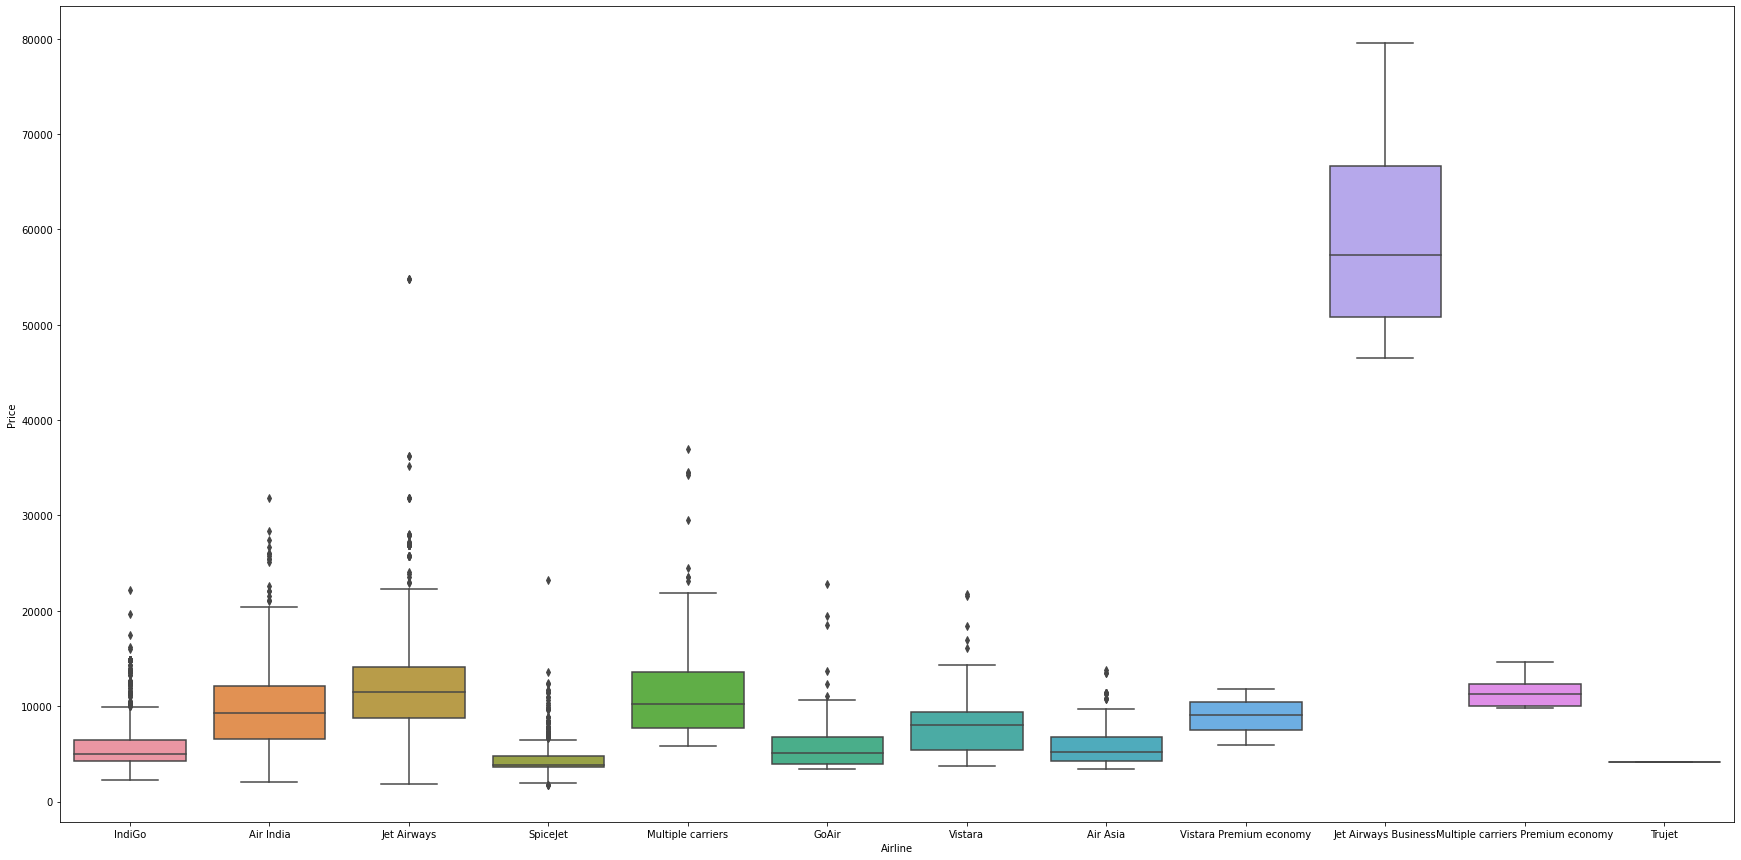

In [40]:
plt.rcParams['figure.figsize'] = (30, 15)
sns.boxplot(x='Airline', y='Price', data=df)

### One hot encoding

In [41]:
airlines = pd.get_dummies(df['Airline'], drop_first=True)

In [42]:
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [43]:
df['Departure Station'].value_counts()

Delhi       3705
Kolkata     2409
Banglore    1840
Mumbai       582
Chennai      320
Name: Departure Station, dtype: int64

In [44]:
df['Arrival Station'].value_counts()


Cochin       3705
Banglore     2409
Delhi        1073
New Delhi     767
Hyderabad     582
Kolkata       320
Name: Arrival Station, dtype: int64

<AxesSubplot:xlabel='Departure Station', ylabel='Price'>

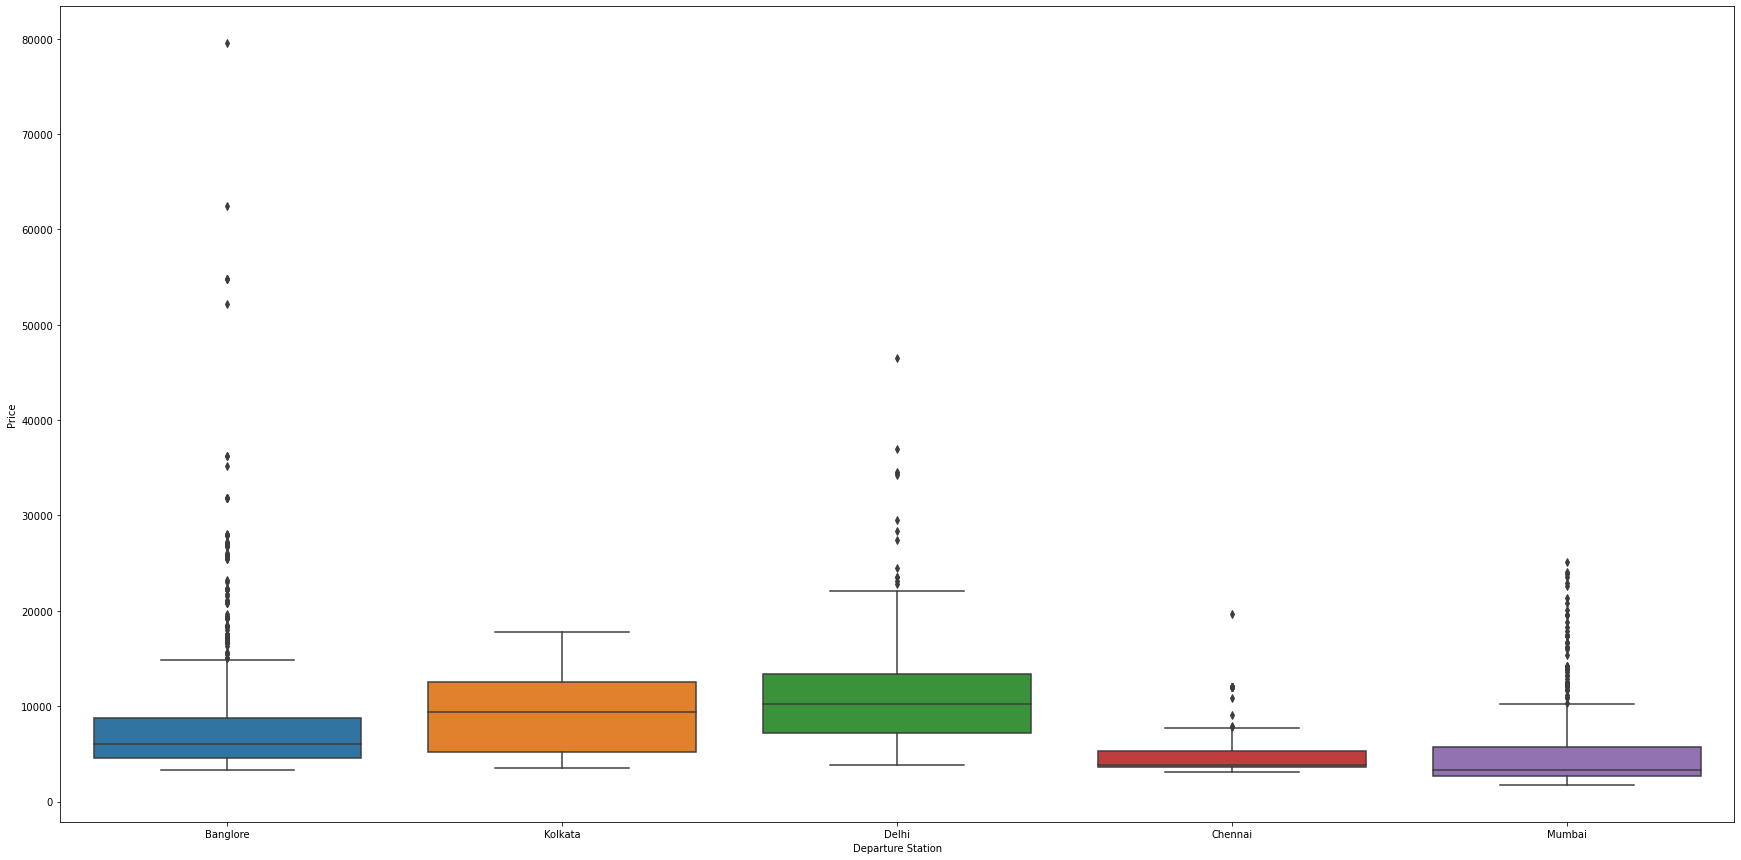

In [45]:
sns.boxplot(x='Departure Station', y='Price', data=df)

In [46]:
departures = pd.get_dummies(df['Departure Station'], drop_first=True, prefix='departure')
departures.head()

,departure_Chennai,departure_Delhi,departure_Kolkata,departure_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


<AxesSubplot:xlabel='Arrival Station', ylabel='Price'>

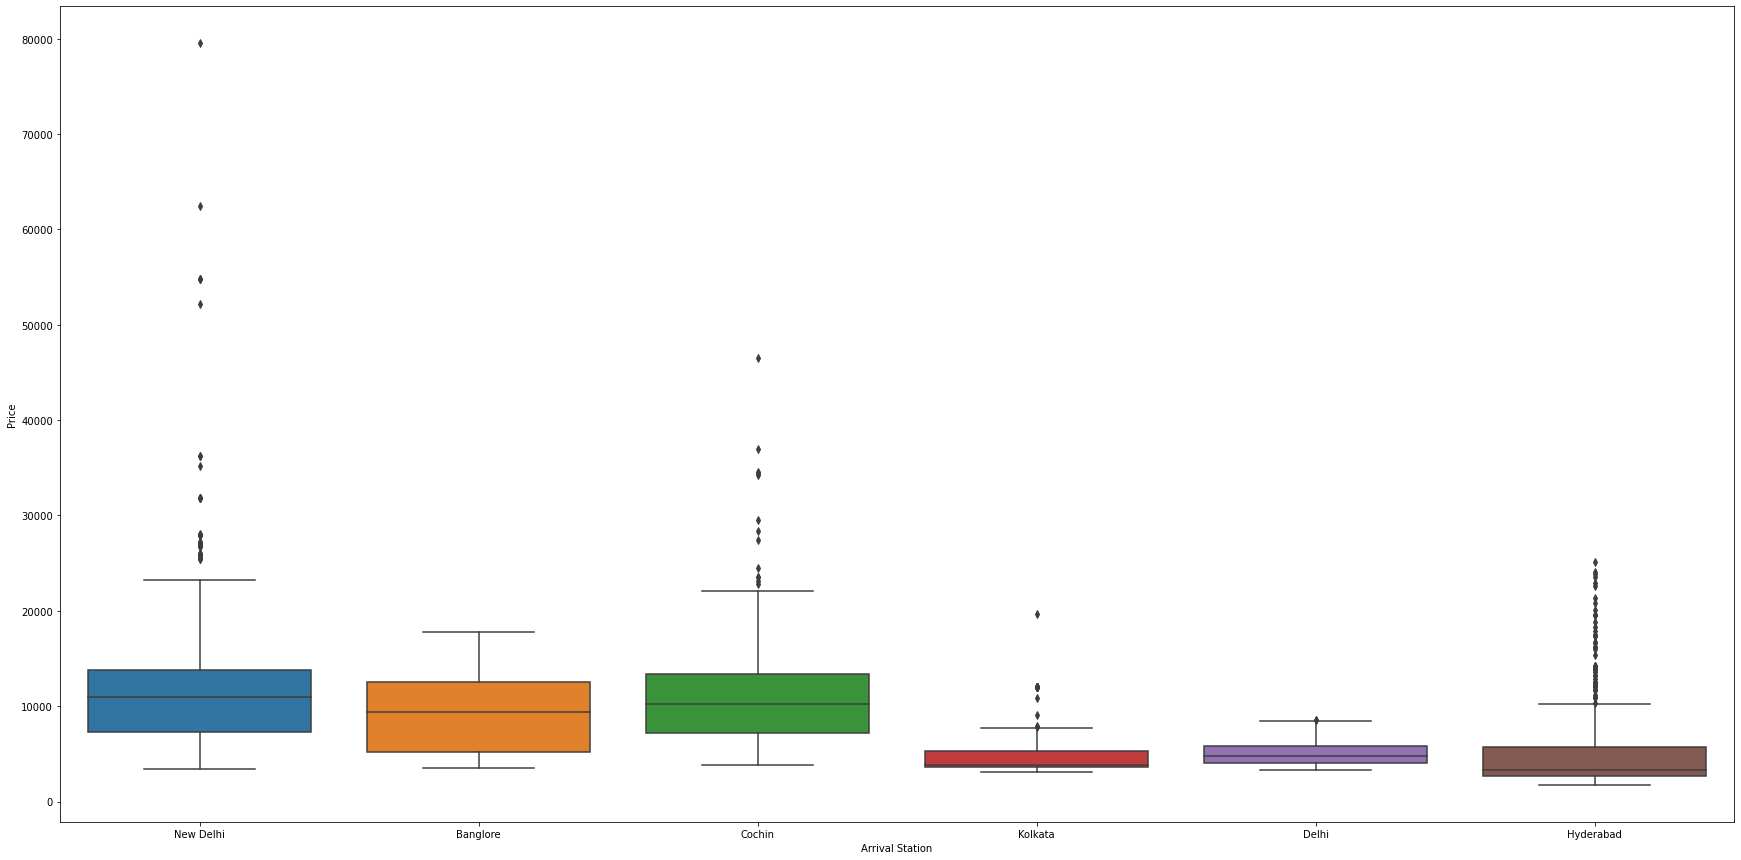

In [47]:
sns.boxplot(x='Arrival Station', y='Price', data=df)


In [48]:
arrivals = pd.get_dummies(df['Arrival Station'], drop_first=True)
arrivals.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [49]:
df['Route Map']

0                   BLR → DEL
1       CCU → IXR → BBI → BLR
2       DEL → LKO → BOM → COK
3             CCU → NAG → BLR
4             BLR → NAG → DEL
                ...          
8995          DEL → BLR → COK
8996                BOM → HYD
8997                BOM → HYD
8998    DEL → GOI → BOM → COK
8999                BLR → DEL
Name: Route Map, Length: 8856, dtype: object

In [50]:
df.Stops.value_counts()

1 stop      4753
non-stop    2936
2 stops     1128
3 stops       39
Name: Stops, dtype: int64

In [51]:
df['Extra Info'].value_counts()

No info                         6944
In-flight meal not included     1616
No check-in baggage included     268
1 Long layover                    17
Change airports                    4
Business class                     3
No Info                            2
1 Short layover                    1
Red-eye flight                     1
Name: Extra Info, dtype: int64

In [52]:
df.describe(include='object')

,Airline,Departure Station,Arrival Station,Route Map,Stops,Extra Info
count,8856,8856,8856,8856,8856,8856
unique,12,5,6,124,4,9
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
freq,3132,3705,3705,2024,4753,6944


In [53]:
((df['Extra Info']=='No info').sum()/df.shape[0])*100

78.41011743450767

In [54]:
# df.drop('Extra Info', axis=1, inplace=True) # Instead of dropping, categorise few values into 'others'

df['Extra Info'] = df['Extra Info'].replace({"No Info": "No info"})

#### categorise the outliers/least occuring values to a new category 'other'

In [55]:
df['Extra Info'].replace({
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)

In [56]:
df = pd.concat([df, pd.get_dummies(df['Extra Info'], drop_first=True)], axis=1)
df.drop('Extra Info', axis=1, inplace=True)

In [57]:
# Aggregate distance from routes. Sample route: "CCU → IXR → BBI → BLR"
df_distance.head()

,Source,Dest,Distance(Km)
0,BLR,DEL,1709.71
1,CCU,IXR,327.84
2,IXR,BBI,344.54
3,BBI,BLR,1166.17
4,DEL,LKO,423.41


In [58]:
df_distance.shape

(126, 3)

#### Calculate the distance based on route map

In [59]:
df_dist_reverse = df_distance.copy()
df_dist_reverse.Source =  df_distance.Dest.copy()
df_dist_reverse.Dest =  df_distance.Source.copy()

df_distance = pd.concat([df_distance, df_dist_reverse], axis=0, ignore_index=True)
df_distance.shape

(252, 3)

In [60]:
def get_distance(source, dest):
    rec = df_distance.loc[((df_distance.Source==source) & (df_distance.Dest==dest))]['Distance(Km)']
    if(rec.empty):
        return np.nan
    return rec.iloc[0]

def get_distance_from_route(route):
    route = route.split(' → ')
    distance = 0
    for i in range(len(route)-1):
        distance += get_distance(route[i], route[i+1])
    return distance

In [61]:
df['Route_Distance'] = [i for i in map(get_distance_from_route , df['Route Map'].values.tolist())]
df.head()

,Airline,Departure Station,Arrival Station,Route Map,Journey Time,Stops,Price,journey_day,journey_month,deprature_hour,deprature_minutes,arrival_hour,arrival_minutes,Change airports,In-flight meal not included,No check-in baggage included,No info,Other,Route_Distance
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,3897,24,3,22,20,1,10,0,0,0,1,0,1709.71
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,7662,1,5,5,50,13,15,0,0,0,1,0,1838.55
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,13882,9,6,9,25,4,25,0,0,0,1,0,2671.33
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,6218,12,5,18,5,23,30,0,0,0,1,0,1874.71
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,13302,1,3,16,50,21,35,0,0,0,1,0,1743.04


In [62]:
df['Route_Distance'].isna().sum()

0

In [63]:
(df['Route_Distance'].isna().sum()/df.shape[0])*100

0.0

### Ordinal encoding

In [64]:
df.Stops.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [65]:
df = pd.concat([df, airlines, departures, arrivals], axis = 1)


In [66]:
df.head()

,Airline,Departure Station,Arrival Station,Route Map,Journey Time,Stops,Price,journey_day,journey_month,deprature_hour,...,Vistara Premium economy,departure_Chennai,departure_Delhi,departure_Kolkata,departure_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,24,3,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,1,5,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,6,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,12,5,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,1,3,16,...,0,0,0,0,0,0,0,0,0,1


### After encoding the categorical data, drop the columns which are not required.

In [67]:
df.drop(['Airline', 'Departure Station', 'Arrival Station', 'Route Map'], axis=1, inplace=True)

In [68]:
df.columns

Index(['Journey Time', 'Stops', 'Price', 'journey_day', 'journey_month',
       'deprature_hour', 'deprature_minutes', 'arrival_hour',
       'arrival_minutes', 'Change airports', 'In-flight meal not included',
       'No check-in baggage included', 'No info', 'Other', 'Route_Distance',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'departure_Chennai',
       'departure_Delhi', 'departure_Kolkata', 'departure_Mumbai', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [69]:
df.head(5)

,Journey Time,Stops,Price,journey_day,journey_month,deprature_hour,deprature_minutes,arrival_hour,arrival_minutes,Change airports,...,Vistara Premium economy,departure_Chennai,departure_Delhi,departure_Kolkata,departure_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,170,0,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,50,13,15,0,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,325,1,6218,12,5,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8856 entries, 0 to 8999
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Journey Time                       8856 non-null   int64  
 1   Stops                              8856 non-null   int64  
 2   Price                              8856 non-null   int64  
 3   journey_day                        8856 non-null   int64  
 4   journey_month                      8856 non-null   int64  
 5   deprature_hour                     8856 non-null   int64  
 6   deprature_minutes                  8856 non-null   int64  
 7   arrival_hour                       8856 non-null   int64  
 8   arrival_minutes                    8856 non-null   int64  
 9   Change airports                    8856 non-null   uint8  
 10  In-flight meal not included        8856 non-null   uint8  
 11  No check-in baggage included       8856 non-null   uint8

In [71]:
df.shape

(8856, 35)

## Split the predictors and target variables

In [72]:
# split into train and test set
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Check for correlation between the predictors and target variables. Also among the predictors.

<AxesSubplot:>

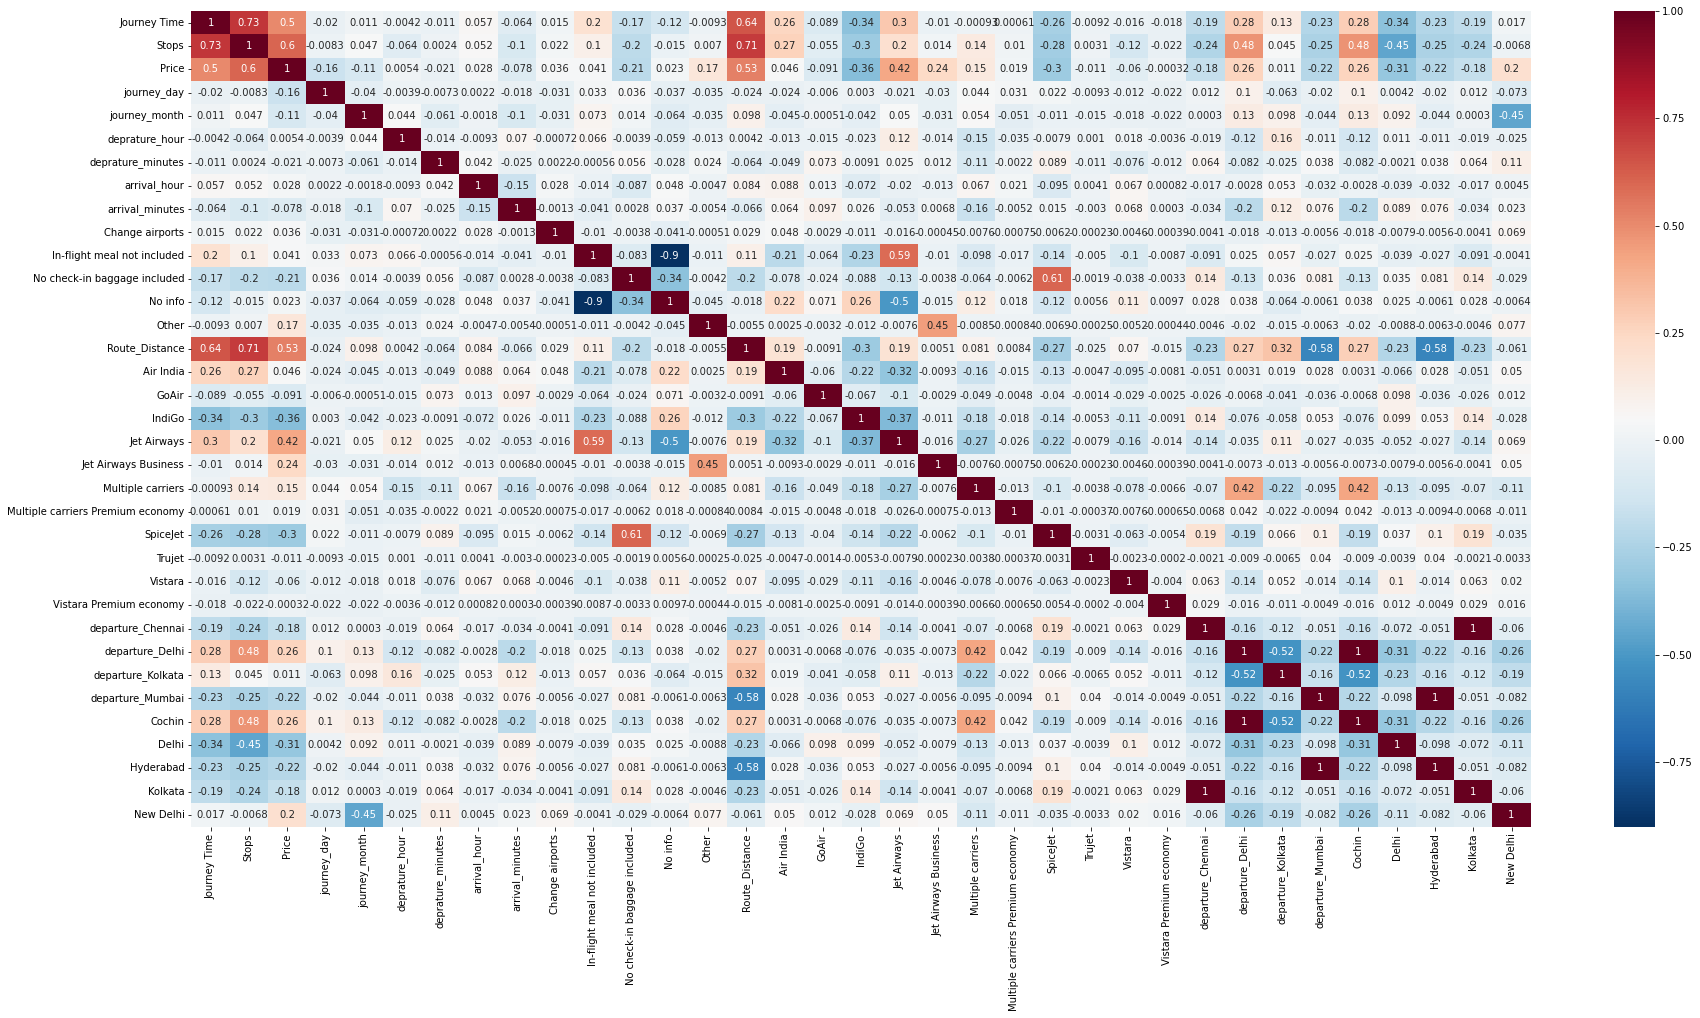

In [73]:
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True)

## Fidn out which features are important.

In [74]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)



ExtraTreesRegressor()

In [75]:

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [76]:
print(selection.feature_importances_)

[7.15327719e-02 2.38497328e-01 1.00521177e-01 4.69225476e-02
 1.79442637e-02 1.68304166e-02 2.70045415e-02 1.61696586e-02
 9.26744308e-04 7.89292955e-02 3.67236119e-05 6.20658656e-03
 2.18824681e-03 8.36013589e-02 9.93167228e-03 1.56234848e-03
 1.31234293e-02 1.18329390e-01 4.96304644e-02 2.43671881e-02
 8.24369318e-04 2.48693181e-03 0.00000000e+00 3.68816642e-03
 1.05635489e-04 5.22881369e-04 4.16074363e-03 3.64175556e-03
 4.68491087e-03 4.31772901e-03 7.03046295e-03 4.42590065e-03
 3.25328493e-04 3.95290312e-02]


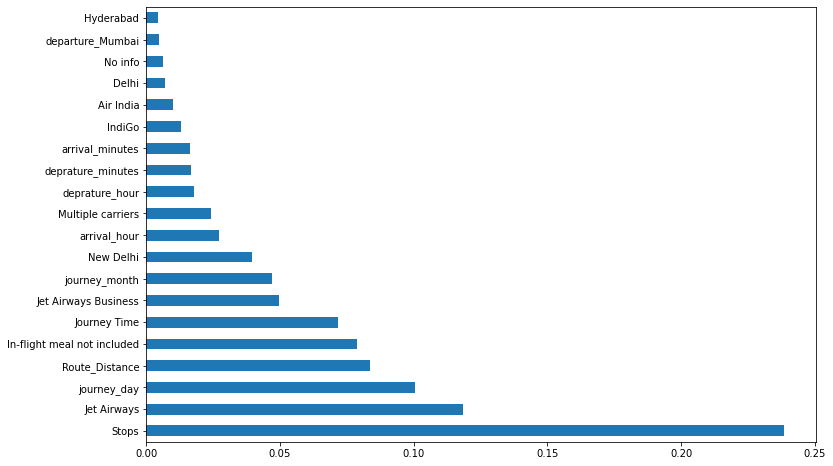

In [77]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

From the above graph, 'Stops' is the most important feature. Some of the features have the same importance. Here we may choose to perform dimentionality reduction.
But we will continue as is because our model could handle well as the dimensionality is not high.

#### Linear Regression

In [79]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred=lin_reg.predict(X_test)


In [93]:
def print_metrics(model, X_train, X_test, y_train, y_test, y_pred):
    print("Score on Training set is",model.score(X_train, y_train))#Training Accuracy
    print("Score on Test Set is",model.score(X_test, y_test))#Testing Accuracy

    accuracies = cross_val_score(lin_reg, X_train, y_train, cv = 10)
    # print(accuracies)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

    print("Mean Absolute Error:" , metrics.mean_absolute_error(y_pred, y_test))

    print("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred))

    print('RMSE:', metrics.mean_squared_error(y_test, y_pred, squared=False))

    print('The r2_score is', metrics.r2_score(y_test, y_pred))

In [94]:
print_metrics(lin_reg, X_train, X_test, y_train, y_test, y_pred)

Score on Training set is 0.6922334729032265
Score on Test Set is 0.7145744108755943
Accuracy: 68.72 %
Standard Deviation: 4.57 %
Mean Absolute Error: 742.737020316027
Mean Squared Error: 3082372.9963318286
RMSE: 1755.6688173832297
The r2_score is 0.8513965808624012


In [95]:
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

In [96]:
print_metrics(dt_reg, X_train, X_test, y_train, y_test, y_pred)

Score on Training set is 0.9967790853835554
Score on Test Set is 0.8513965808624012
Accuracy: 68.72 %
Standard Deviation: 4.57 %
Mean Absolute Error: 742.737020316027
Mean Squared Error: 3082372.9963318286
RMSE: 1755.6688173832297
The r2_score is 0.8513965808624012


### Fit model using Random forest

In [97]:

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

In [98]:
print_metrics(reg_rf, X_train, X_test, y_train, y_test, y_pred)

Score on Training set is 0.9813280353945968
Score on Test Set is 0.9201078920252057
Accuracy: 68.72 %
Standard Deviation: 4.57 %
Mean Absolute Error: 643.9289334623239
Mean Squared Error: 1657144.079662876
RMSE: 1287.3010835320833
The r2_score is 0.9201078920252057


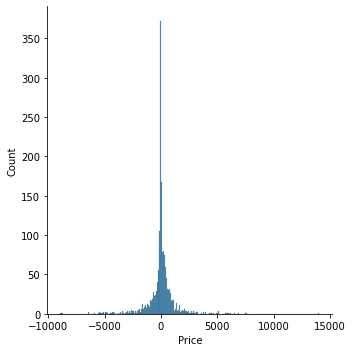

In [99]:
sns.displot(y_pred-y_test)

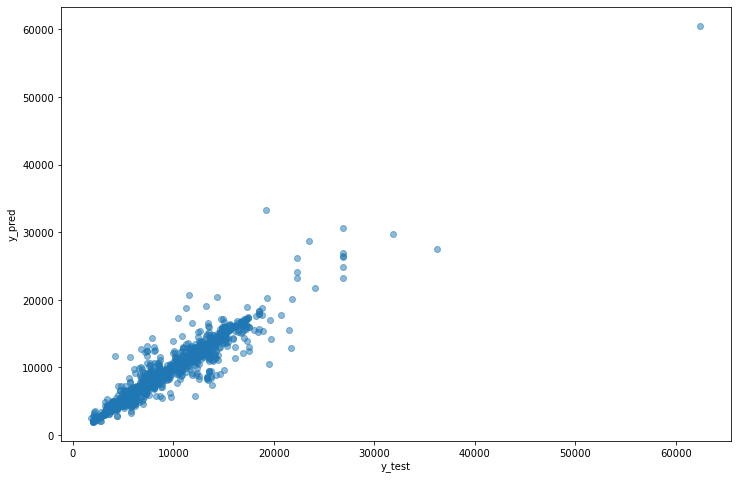

In [100]:
plt.figure(figsize = (12,8))

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [310]:
metrics.r2_score(y_test, y_pred)

0.920499792203634

In [105]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100, 200]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 20]


In [106]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [107]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [108]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=900; total time=   4.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   4.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   4.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              200],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [109]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [110]:
predictions = rf_random.predict(X_test)

<Figure size 576x576 with 0 Axes>

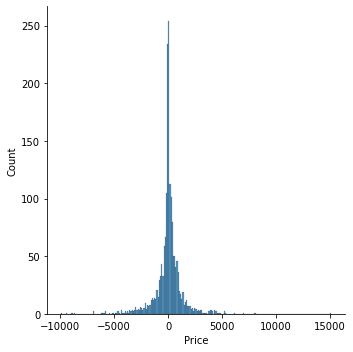

In [111]:
plt.figure(figsize = (8,8))
sns.displot(predictions-y_test)

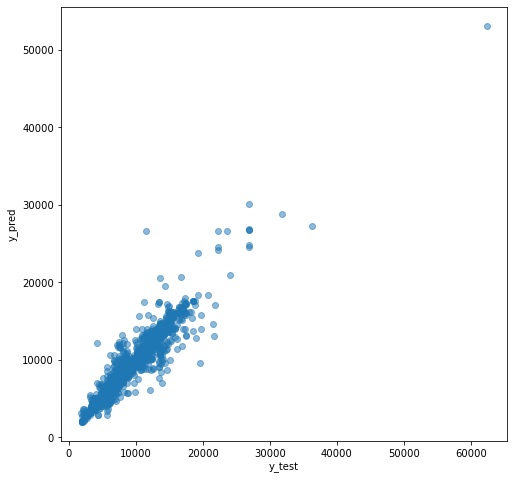

In [112]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [113]:
print_metrics(rf_random, X_train, X_test, y_train, y_test, predictions)

Score on Training set is -1415760.6545441183
Score on Test Set is -1801096.491816407
Accuracy: 68.72 %
Standard Deviation: 4.57 %
Mean Absolute Error: 728.4188649319133
Mean Squared Error: 1801096.491816407
RMSE: 1342.0493626601099
The r2_score is 0.9131678426980876


In [117]:
y_train_pred = rf_random.predict(X_train)
y_test_pred = rf_random.predict(X_test)

In [118]:
print("Train Results:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results:
--------------------------------------------------
Root mean squared error:  1189.8574093327816
Mean absolute % error:  6
R-squared:  0.9339071331674736


In [119]:
print("Test Results:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results:
--------------------------------------------------
Root mean squared error:  1342.0493626601099
Mean absolute % error:  8
R-squared:  0.9131678426980876


### Try xgboost.

In [101]:
# import XGBRegressor
from xgboost import XGBRegressor

In [102]:
# pd.Series(X_train.columns.to_list()).value_counts()

In [103]:
# XGB regressor
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

/Users/srikeshnagoji/miniforge3/envs/MLENV/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/srikeshnagoji/miniforge3/envs/MLENV/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/srikeshnagoji/miniforge3/envs/MLENV/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/srikeshnagoji/miniforge3/envs/MLENV/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index 

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                       

In [114]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [115]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  754.514138971659
Mean absolute % error:  6
R-squared:  0.9734233940916938


In [116]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1333.684257188352
Mean absolute % error:  9
R-squared:  0.9142469332928802


## Random Forest Regressor & XGB are giving Maximum Accuracy compared to other Regressor algorithms.

Save and reuse model.

In [329]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
test_pred = loaded_model.predict(X_test)
mse = metrics.mean_squared_error(y_test, test_pred, squared=False)
mse


1332.3559882289746